# Project Predicting the Satisfaction Level of Santander Bank Customers

   Neste projeto foi desenvolvido um modelo preditivo para identificar clientes insatisfeitos no começo do relacionamento
com o banco Santander. 
   Essa predição foi baseado em imformações históricas, coletadas de antigos e atuais clientes, possibilitando a 
previsão de satisfação de novos clientes.


In this project, was developed a predictive model to identify unhappy customers at the beginning of the relationship with Santander Bank. 
It was based on historical information collected from the past and current customers, making it possible to predict the satisfaction of new customers.

In [1]:
# Packages used to load and clear data
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing the training file with the target variable
x_train = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/train.csv")

In [3]:

x_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
x_train.shape

(76020, 371)

In [5]:
# Importing the test file  
x_test = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/test.csv")

In [6]:
# Loanding the TARGET file
submission = pd.read_csv("C:/FCD/Projetos_github/Santander_Customer_Satisfaction/Projeto/data_santander/sample_submission.csv")

## Analise Exploratória

In [7]:
x_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


Algumas considerações referêntes às observações acima nas colunas:
- var3: Nessa coluna existe um valor desconhecido -999999.000000 que devemos imputar
- var15: existe valoresde 5 até 105, esta variável pode representar a idade
- var38: seus valores estão dentro de um intervalo de  5163.75000 até 22034740.000, por isso pode representar valores financeiros. 

In [8]:
# Imputação do valor -999999 pela moda que é 2
x_train.var3 = x_train.var3.replace(-999999,2)
x_test.var3 = x_test.var3.replace(-999999,2)

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
# De todas variáveis, existem 259 do tipo int64 e 111 do tipo float64
x_train.dtypes.value_counts()

int64      260
float64    111
dtype: int64

96.0431465403841 %
3.9568534596158904 %


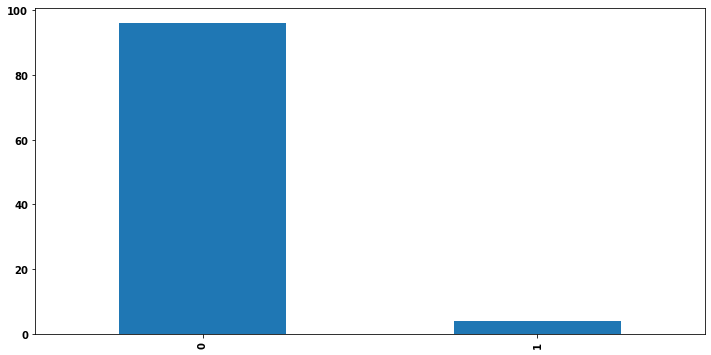

In [11]:
# A variável targe está desbalanceada
target = x_train.TARGET.value_counts()/len(x_train)*100
target.plot(kind='bar', figsize=(12,6))
print(target[0],"%")
print(target[1],"%")

In [12]:
# Não há valores Nan
x_train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

<AxesSubplot:>

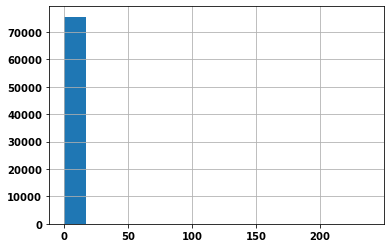

In [13]:
x_train.var3.hist(bins=14)

In [14]:
x_train.var3.describe()

count    76020.000000
mean         2.716483
std          9.447971
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        238.000000
Name: var3, dtype: float64

####  Na coluna var3 a maioria dos clientes tem o mesmo valor (75%) o que representa uma caracteristica comum entre eles, que pode ser o sexo ou o paíz

In [15]:
x_train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

#### Supondo que a variável var15 é a idade do cliente, podemos observar que no histograma Zero(0) que representa os clientes satisfeitos, há uma frequência relevante na idade próxima ou igual a 25 anos.

#### Já no histograma Um(1), observa-se uma frequência relevante nos intervalos de 25 até 55.

#### A maioria dos clientes estão entre 25 e 35 anos.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

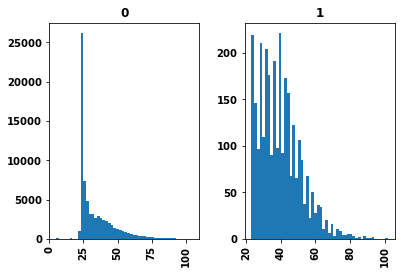

In [16]:
x_train.var15.hist(by=x_train.TARGET, bins=50)

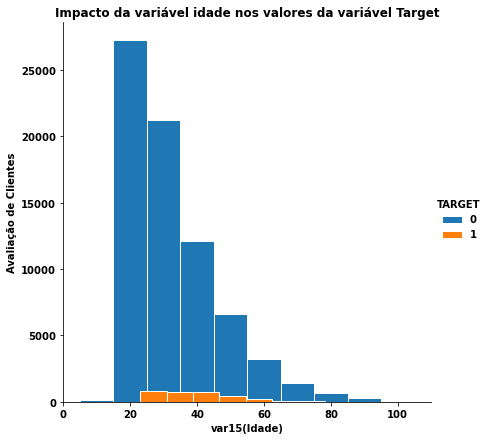

In [17]:
sns.FacetGrid(x_train, hue="TARGET", size=6) \
   .map(plt.hist, "var15",edgecolor='w', bins=10) \
   .add_legend()
plt.xlabel("var15(Idade)")
plt.ylabel("Avaliação de Clientes")
plt.title('Impacto da variável idade nos valores da variável Target')
plt.show()

<AxesSubplot:title={'center':'var15'}, xlabel='TARGET'>

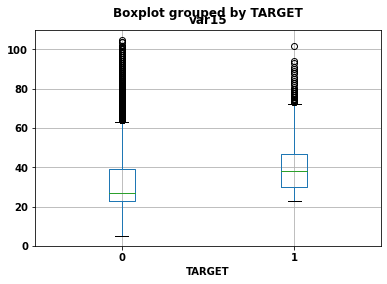

In [18]:
# Através do gráfico bosxplot mostra claramente a existencia de outiliers com valores grandes
x_train.boxplot(column='var15', by='TARGET')

In [19]:
# Analisando o describe da coluna var38, que supoe ser valores finaceiros
x_train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

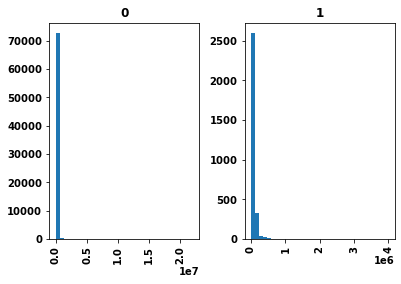

In [20]:
x_train.var38.hist(by=x_train.TARGET, bins=35)

### Analisando valores estatisticos de cada variável sob uma transposta do describe() e ordenando os valores pelo desvio padrão crescente, percebe-se que há muitas colunas com valores somente de zeros

In [21]:
print(x_train.describe().T.query('std==0').head(),"\n",len(x_train.describe().T.query('std==0')))

               count  mean  std  min  25%  50%  75%  max
ind_var2_0   76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var2     76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var27_0  76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var28_0  76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
ind_var28    76020.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 34


In [22]:
del_col = x_train.describe().T.sort_values(by='std')
del_col = del_col.query('std==0')

In [23]:
del_col.index

Index(['ind_var27_0', 'imp_amort_var34_hace3', 'saldo_var46',
       'num_trasp_var17_out_hace3', 'ind_var2_0', 'ind_var2', 'saldo_var28',
       'num_var46', 'saldo_var27', 'imp_amort_var18_hace3', 'ind_var41',
       'num_reemb_var33_hace3', 'ind_var46_0', 'saldo_var41',
       'num_reemb_var13_hace3', 'ind_var28_0', 'num_var46_0',
       'num_trasp_var33_out_hace3', 'num_var27_0', 'ind_var28', 'ind_var27',
       'num_var41', 'imp_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'num_var2_0_ult1', 'imp_trasp_var17_out_hace3', 'num_var27',
       'imp_reemb_var33_hace3', 'num_var28', 'num_var28_0',
       'imp_reemb_var13_hace3', 'saldo_medio_var13_medio_hace3',
       'num_var2_ult1', 'ind_var46'],
      dtype='object')

In [24]:
x_train.shape, x_test.shape

((76020, 371), (75818, 370))

### Vamos selecionar essas colunas com valores zeros e deletá-las

In [25]:
x_train.drop(del_col.index, axis=1, inplace=True)
x_test.drop(del_col.index, axis=1, inplace=True)

In [26]:
x_train.shape, x_test.shape

((76020, 337), (75818, 336))

In [27]:
# Agora temos 197 inteiros e 110 flutuantes
x_train.dtypes.value_counts()

int64      226
float64    111
dtype: int64

### listando as colunas onde a maioria dos valores são igual (99.9%), e imprimindo as colunas selecionadas

In [28]:
features = []
for f in x_train.columns:
    aprox = (x_train[f].value_counts()/np.float(len(x_train))).sort_values(ascending=False).values[0]
    if aprox > 0.999:
        features.append(f)
x_train[features]    

,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,ind_var6_0,ind_var6,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var29_0,ind_var29,...,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace3
0,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76016,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76017,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76018,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fazendo uma cópia e deletando as colunas de valores constantes

In [29]:
x_train_vc = x_train.drop(columns= features, axis=1)
x_test_vc = x_test.drop(columns= features, axis=1)

In [30]:
x_train_vc.shape, x_test_vc.shape

((76020, 225), (75818, 224))

### listando as colunas duplicadas e excluido-as, pois duas colunas com praticamente a mesma informação atrapalhará o modelo 

In [31]:
col_duplicates = []
columns = x_train.columns
for i in range(len(columns)-1):
    s = x_train[columns[i]].values
    for j in range(i+1, len(columns)):
        if np.array_equal(s, x_train[columns[j]].values):
            col_duplicates.append(columns[j])

x_train[col_duplicates]

,ind_var29_0,ind_var29,ind_var13_medio,ind_var18,ind_var26,ind_var25,ind_var32,ind_var34,ind_var37,ind_var39,...,num_var39,saldo_var29,saldo_medio_var13_medio_ult1,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76016,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76017,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0
76018,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0,0


In [32]:
x_train.drop(col_duplicates, axis=1, inplace=True)
x_test.drop(col_duplicates, axis=1, inplace=True)

# checado shape
x_train.shape, x_test.shape

((76020, 308), (75818, 307))

In [33]:
# Deletabdo as colunas duplicadas 
for i in col_duplicates:
    if i in x_train_vc and i in x_test_vc:
        x_train_vc.drop(labels=i, axis=1, inplace=True)
        x_test_vc.drop(labels=i, axis=1, inplace=True)

## Analise de Variância

In [34]:
from sklearn.feature_selection import VarianceThreshold

#### Função para selecionar colunas com variância menores que 0.02, pois essas colunas tem pouco impacto nos dados

VAR = mean(abs(x - x.mean())**2)

In [35]:
def colunas_baixa_var(data):
    threshold=0.98
    sel = VarianceThreshold(threshold=(threshold* (1 - threshold) ))
    sel_var=sel.fit_transform(data)
    return data.columns[sel.get_support(indices=True)]

In [36]:
(x_train.var() < 0.02).value_counts()

False    249
True      59
dtype: int64

#### Removendo features com variância menor que 0.02 em um novo dataset

In [37]:
x_train_hv = x_train[colunas_baixa_var(x_train)].copy()
x_test_hv = x_test[colunas_baixa_var(x_train)[:-1]].copy()

In [38]:
# shape dataset após remoção das colunas com baixa variância
x_train_hv.shape, x_test_hv.shape

((76020, 249), (75818, 248))

In [39]:
len(x_test_vc.columns), len(x_train_vc.columns), len(x_test_vc[colunas_baixa_var(x_test_vc)].columns)\
, len(x_train_vc[colunas_baixa_var(x_train_vc)].columns)

(214, 215, 189, 190)

In [40]:
x_train_vc_hv = x_train_vc[colunas_baixa_var(x_train_vc)].copy()
x_test_vc_hv = x_test_vc[colunas_baixa_var(x_test_vc)].copy()

In [41]:
x_train_vc_hv.shape, x_test_vc_hv.shape

((76020, 190), (75818, 189))

### Analise de Correlação

#### Função para listar nomes de colunas com correlação maior do que 0.95

In [42]:
def achar_corr_colunas(data):
    
    # criar uma matriz de correlação com valores absolutos 
    corr_matrix = data.corr().abs()
    
    # Selecione o triângulo superior da matrix de correlação definido por k=1
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    
    # Encontrar variáveis com correlação maior do que 0.95
    to_drop=[colum for colum in upper.columns if any(upper[colum] > 0.95)]
    
    print(len(to_drop))
    return to_drop

In [43]:
x_train_hv_co = x_train_hv.drop(achar_corr_colunas(x_train_hv), axis=1)
x_test_hv_co = x_test_hv.drop(achar_corr_colunas(x_train_hv), axis=1)

70
70


In [44]:
x_train_hv_co.shape, x_test_hv_co.shape

((76020, 179), (75818, 178))

In [45]:
x_train_vc_hv_co = x_train_vc_hv.drop(achar_corr_colunas(x_train_vc_hv), axis=1)
x_test_vc_hv_co = x_test_vc_hv.drop(achar_corr_colunas(x_train_vc_hv), axis=1)

55
55


In [46]:
x_train_vc_hv_co.shape, x_test_vc_hv_co.shape

((76020, 135), (75818, 134))

<Figure size 864x576 with 0 Axes>

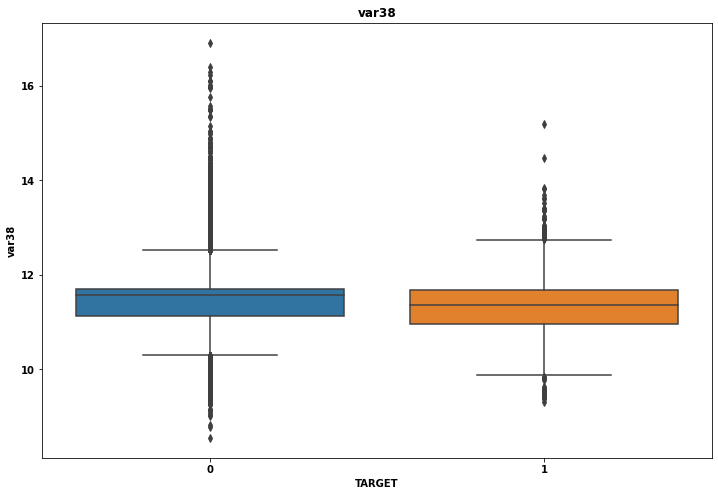

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

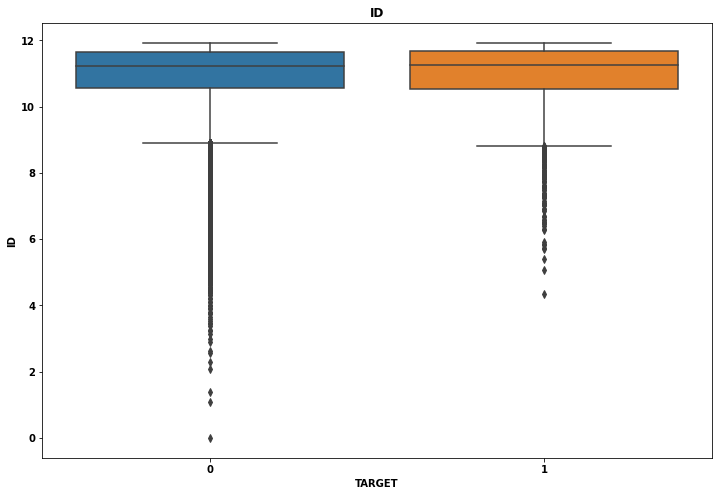

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [47]:
for i in x_train_vc_hv_co.var().sort_values(ascending=False).index[1:10]:
    plt.figure(figsize=(12,8))
    data = x_train.copy() 
    if 0 in data[i].unique():
        pass
    else:    
        data[i]=np.log(data[i])
        sns.boxplot(y=i, x= "TARGET", data= data)
        plt.ylabel(i)
        plt.title(i)
        plt.yticks()
        plt.show()
        

In [48]:
q1 = x_train_vc_hv_co.quantile(0.25)

In [49]:
q3 = x_train_vc_hv_co.quantile(0.75)

In [50]:
iqr = q3-q1

In [51]:
iqr

ID                              75644.00
var3                                0.00
var15                              17.00
imp_ent_var16_ult1                  0.00
imp_op_var39_comer_ult1             0.00
                                  ...   
saldo_medio_var13_largo_ult1        0.00
saldo_medio_var44_hace2             0.00
saldo_medio_var44_ult1              0.00
var38                           50885.64
TARGET                              0.00
Length: 135, dtype: float64

In [52]:
# achando outliers no dataset
print(x_train_vc_hv_co < (q1 - 1.5*iqr)) or (x_train_vc_hv_co > (q3 + 1.5*iqr))

          ID   var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0      False  False  False               False                    False   
1      False  False  False               False                    False   
2      False  False  False               False                    False   
3      False  False  False               False                    False   
4      False  False  False               False                    False   
...      ...    ...    ...                 ...                      ...   
76015  False  False  False               False                    False   
76016  False  False  False               False                    False   
76017  False  False  False               False                    False   
76018  False  False  False               False                    False   
76019  False  False  False               False                    False   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
0                        False          

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var44_hace2,saldo_medio_var44_ult1,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# Removendo outliers

x_train_ag = x_train_vc_hv_co.copy()
x_train_sair = x_train_ag[((x_train_ag >= (q1 - 1.5*iqr)) & (x_train_ag <= (q3 + 1.5*iqr))).all(axis=1)]

In [54]:
x_train_sair

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_ult1,imp_op_var41_efect_ult1,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var44_hace2,saldo_medio_var44_ult1,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
5,13,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
8,20,2,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76010,151816,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,165616.320000,0
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [55]:
x_train_sair.TARGET.value_counts()

0    27154
Name: TARGET, dtype: int64

In [56]:
# Remover as colunas target e ID para dimencionar os dados entre -1 e 1

x_train_scaled2 = x_train_hv_co.drop(["ID","TARGET"], axis=1)
x_train_scaled1 = x_train_vc_hv_co.drop(["ID","TARGET"], axis=1)
x_train_scaled =x_train.drop(["ID","TARGET"], axis=1)

In [57]:
print(x_train_scaled.shape, x_train_scaled1.shape, x_train_scaled2.shape)

(76020, 306) (76020, 133) (76020, 177)


### Análise PCA

In [58]:
from sklearn.decomposition import PCA
def find_pca_components(data):
    pca = PCA().fit(data)
    plt.rcParams["figure.figsize"] = (12,6)

    fig, ax = plt.subplots()
    xi = np.arange(1, data.shape[1]+1, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0,1.1)
    plt.plot(xi/2, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Número de Componentes')
    plt.xticks(np.arange(0, data.shape[1]/2, step=3)) #mudar de índice de matriz baseado em 0 para rótulo legível por humanos baseado em 1
    plt.ylabel('Variância cumulativa (%)')
    plt.title('O número de componentes necessários para explicar a variação')
    plt.axhline(y=0.98, color='r', linestyle='-')
    plt.text(0.7, 0.85, 'Limite de corte de 98%', color = 'red', fontsize=16)
    print("Previsão do componente Pca:")
    ax.grid(axis='x')
    plt.show()

Previsão do componente Pca:


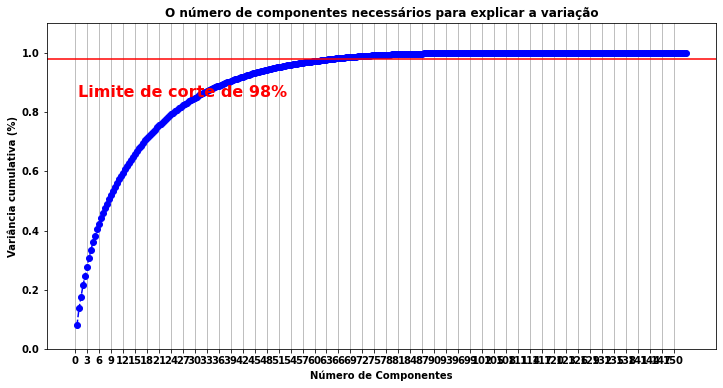

Previsão do componente Pca:


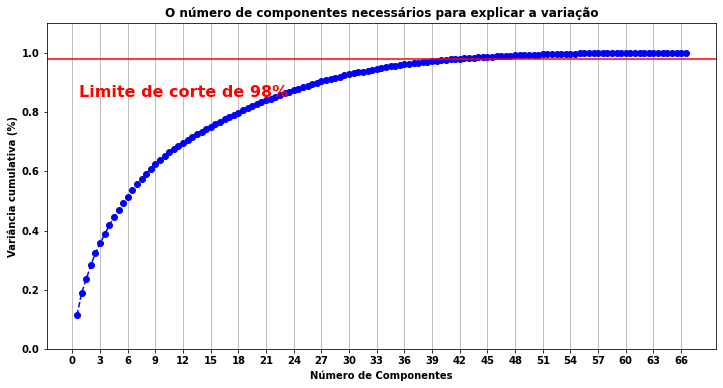

Previsão do componente Pca:


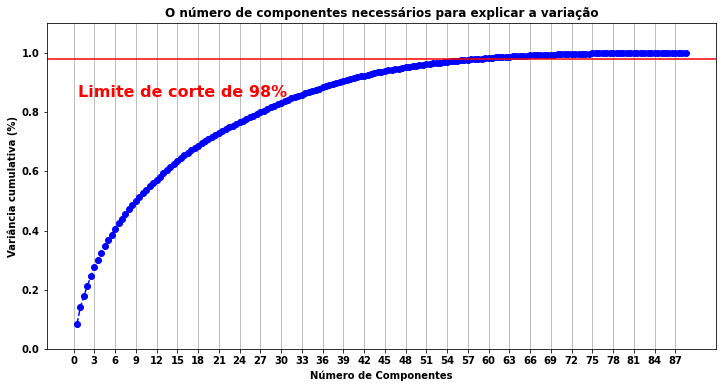

In [59]:
from sklearn.preprocessing import StandardScaler
for data in [x_train_scaled, x_train_scaled1,x_train_scaled2]:
    scaler = StandardScaler()
    find_pca_components(scaler.fit_transform(data))

### A partir da visualização acima, podemos dizer que precisamos ter 72, 51 e 66 componentes pca para cada conjunto de dados, respectivamente

In [60]:
def pca_analysis(n_co,data):
    pca = PCA(n_components=n_co)
    data_transformed = pca.fit_transform(data)
    print("Análise de PCA para componentes% s pca"%(n_co))
    print("Vetor próprio para cada componente principal : ",pca.components_)
    print("Quantidade de variação por cada PCA:", pca.explained_variance_)
    print("Porcentagem de variação por cada PCA: ", pca.explained_variance_ratio_)
    print("número de recursos nos dados de treinamento:", pca.n_features_)
    print("número de amostras nos dados de treinamento:", pca.n_samples_)
    print("variação de ruído dos dados:",pca.noise_variance_)
    return pd.DataFrame(data_transformed)

In [61]:
data_transformed=[]
for no, data in [(72,x_train_scaled),(51,x_train_scaled1),(66,x_train_scaled2)]:
    scaler = StandardScaler()
    data_transformed.append(pca_analysis(no,scaler.fit_transform(data)))

Análise de PCA para componentes72 pca
Vetor próprio para cada componente principal :  [[ 0.02113434  0.05593294  0.01339642 ...  0.01161863  0.01173355
   0.00123707]
 [ 0.00052017  0.0822711   0.00974758 ...  0.00629255  0.00684661
   0.00510105]
 [ 0.02630599  0.00814345  0.00211272 ...  0.10439284  0.10906316
   0.00224843]
 ...
 [ 0.0180531   0.13500553 -0.00881525 ...  0.00965524  0.00609806
   0.02556891]
 [ 0.1063485  -0.05888649  0.16065519 ...  0.03007914  0.02038174
   0.05553071]
 [-0.12455603  0.10676099 -0.03014085 ...  0.00207814  0.00240378
   0.0721186 ]]
Quantidade de variação por cada PCA: [24.93897344 17.3403775  11.98789376 11.58611205  9.80506027  9.41518899
  9.18987172  8.56473005  7.55470127  6.76046542  6.51484624  6.12613259
  5.75733096  5.32408334  4.79834176  4.72748162  4.58568067  4.56690198
  4.24678754  4.00882998  3.85337076  3.72697389  3.62008114  3.4216139
  3.34520043  3.31947356  3.19332395  3.16461679  3.07314617  3.07016388
  2.97224384  2.89802

In [62]:
from sklearn.utils import resample

In [63]:
def upsampling_dataset(data):
    data_majority=data[data.TARGET==0] 
    data_minority=data[data.TARGET==1]  

    data_minority_upsampled=resample(data_minority,replace=True,n_samples=73012)
    data_upsampled=pd.concat([data_minority_upsampled,data_majority])

    data_upsampled.info()
    print(data_upsampled['TARGET'].value_counts())
    return data_upsampled

In [64]:
def upsampling_dataset(data):
    maior = data[data.TARGET==0]
    menor = data[data.TARGET==1]
    
    upsampled = resample(menor, replace=True, n_samples=73012)
    
    data_upsampled = pd.concat([upsampled,maior])
    
    data_upsampled.info()
    
    print(data_upsampled['TARGET'].value_counts())
    return data_upsampled

In [65]:
datasets = [x_train, x_train_vc_hv_co, x_train_hv_co]

In [66]:
upsampled_data = []
for data in datasets:
    upsampled_data.append(upsampling_dataset(data))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 22514 to 76019
Columns: 308 entries, ID to TARGET
dtypes: float64(110), int64(198)
memory usage: 344.2 MB
1    73012
0    73012
Name: TARGET, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 65633 to 76019
Columns: 135 entries, ID to TARGET
dtypes: float64(52), int64(83)
memory usage: 151.5 MB
1    73012
0    73012
Name: TARGET, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146024 entries, 11364 to 76019
Columns: 179 entries, ID to TARGET
dtypes: float64(78), int64(101)
memory usage: 200.5 MB
1    73012
0    73012
Name: TARGET, dtype: int64


## Engenharia de Atributos

In [67]:
if 'ID' not in data_transformed[2]:
    data_transformed[2].insert(1, 'ID', x_train['ID'])
x_pca = data_transformed[2]
y_pca = x_train["TARGET"]

In [68]:
x_upsample = upsampled_data[2].drop("TARGET", axis=1)
y_upsample = upsampled_data[2]["TARGET"]

In [69]:
x = datasets[2].drop("TARGET", axis=1)
y = datasets[2]["TARGET"]

In [70]:
print(x_pca.shape, y_pca.shape, x_upsample.shape, y_upsample.shape, x.shape, y.shape)

(76020, 67) (76020,) (146024, 178) (146024,) (76020, 178) (76020,)


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=44)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size=0.30, random_state=44)

X_upsample_train, X_upsample_test, y_upsample_train, y_upsample_test = train_test_split(x_upsample, y_upsample, test_size=0.30, random_state=44)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [74]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=200))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200))

In [75]:
selected_features = X_train.columns[(sel_.get_support())]
len(selected_features)

23

In [76]:
x_train[selected_features]

,ID,var15,imp_op_var41_efect_ult3,imp_op_var41_ult1,num_var4,saldo_var5,saldo_var30,var36,num_var22_hace2,num_var22_hace3,...,num_meses_var5_ult3,num_meses_var39_vig_ult3,num_var45_hace2,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,1,23,0.0,0.0,0,0.00,0.00,99,0,0,...,0,2,0,0,0,0.00,0.00,0.00,0.00,39205.170000
1,3,34,0.0,0.0,1,0.00,300.00,3,0,0,...,1,2,0,0,0,0.00,88.89,0.00,0.00,49278.030000
2,4,23,0.0,0.0,1,3.00,3.00,99,0,0,...,3,1,0,0,0,3.00,0.18,3.00,2.07,67333.770000
3,8,37,0.0,195.0,3,70.62,70.62,2,3,0,...,2,1,27,3,18,186.09,0.00,91.56,138.84,64007.970000
4,10,39,0.0,0.0,1,0.00,135003.00,1,3,0,...,3,2,0,0,0,3.00,0.30,40501.08,13501.47,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,48,0.0,0.0,0,0.00,0.00,99,0,0,...,0,2,0,0,0,0.00,0.00,0.00,0.00,60926.490000
76016,151830,39,0.0,0.0,1,0.00,48191.22,2,24,0,...,1,2,36,3,9,130.65,0.00,0.00,0.00,118634.520000
76017,151835,23,0.0,0.0,1,3.00,3.00,99,0,0,...,2,1,0,0,0,3.00,0.00,3.00,3.00,74028.150000
76018,151836,25,0.0,0.0,1,3.00,3.00,99,0,0,...,3,2,0,0,0,3.00,1.74,3.00,2.58,84278.160000


## Construção e análise de modelos
#### Criamos diferentes conjuntos de dados, como: conjunto de dados original, conjunto de dados sem constantes e recursos duplicados, conjunto de dados sem constante, recursos duplicados, baixa variação e recursos correlacionados e seus dados transformados PCA, conjuntos de dados upsampled
#### Usaremos conjuntos de dados acima para treinar o modelo usando os algoritmos abaixo

#### 1.Logistic regression
#### 2.Random Forest
#### 3.Decision Tree
#### 4.Bagging classifier
#### 5.Support vector classifier
#### 6.Gradient Boosting classifier
#### 7.kNearest neighbors classifier

In [77]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [78]:
# Preparação de modelos

models = []
models.append(('LR', LogisticRegression(class_weight='balanced')))
models.append(('Bagging Classifier',BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier(weights='distance')))
models.append(('RandomForest', RandomForestClassifier(class_weight='balanced')))
models.append(('DecisionTree', DecisionTreeClassifier(class_weight='balanced')))
models.append(('GradientBoosting', GradientBoostingClassifier()))
models.append(('xgb', XGBClassifier(missing=np.nan, max_depth=6, 
n_estimators=350, learning_rate=0.025, nthread=4, subsample=0.95,
colsample_bytree=0.85, seed=4242)))

In [79]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score,roc_curve,roc_auc_score,precision_score,recall_score,accuracy_score

In [80]:
# df_scores=pd.DataFrame()
# pred_dict={}
for name,model in models:
    model.fit(X_train,y_train)
    result = model.score(X_test, y_test)
    print(name,"Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

LR Acurácia nos Dados de Teste: 51.912%
Bagging Classifier Acurácia nos Dados de Teste: 95.685%
KNN Acurácia nos Dados de Teste: 95.510%
RandomForest Acurácia nos Dados de Teste: 95.826%
DecisionTree Acurácia nos Dados de Teste: 93.015%
GradientBoosting Acurácia nos Dados de Teste: 96.010%
xgb Acurácia nos Dados de Teste: 96.049%
